In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
DATA_PATH = "../data/raw/survey_results_public.csv"
df = pd.read_csv(DATA_PATH)

C:\Users\witch\AppData\Local\Temp\ipykernel_10812\1071638689.py:2: DtypeWarning: Columns (56,74,92,97,98,105,109,110,132,162,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


In [32]:
cols = [
    "LanguageHaveWorkedWith",
    "YearsCode",
    "ConvertedCompYearly"
]

df = df[cols].dropna()
df.head()


,LanguageHaveWorkedWith,YearsCode,ConvertedCompYearly
0,Bash/Shell (all shells);Dart;SQL,14.0,61256.0
1,Java,10.0,104413.0
2,Dart;HTML/CSS;JavaScript;TypeScript,12.0,53061.0
3,Java;Kotlin;SQL,5.0,36197.0
4,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,22.0,60000.0


In [33]:
df["LanguageHaveWorkedWith"] = df["LanguageHaveWorkedWith"].str.split(";")

lang_df = df.explode("LanguageHaveWorkedWith")
lang_df.head()

,LanguageHaveWorkedWith,YearsCode,ConvertedCompYearly
0,Bash/Shell (all shells),14.0,61256.0
0,Dart,14.0,61256.0
0,SQL,14.0,61256.0
1,Java,10.0,104413.0
2,Dart,12.0,53061.0


In [34]:
lang_df.to_csv("../data/processed/survey_results_language_trends.csv")

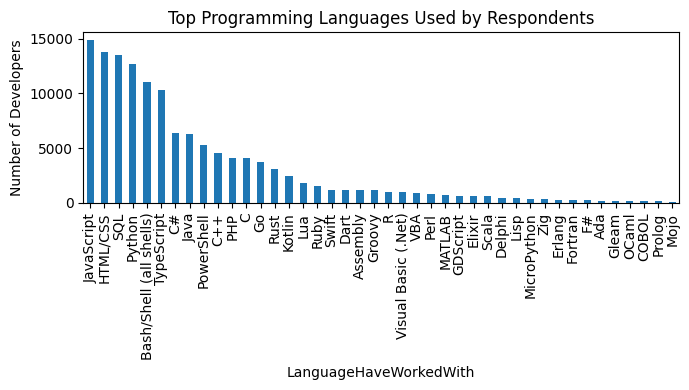

In [35]:
top_langs = (
    lang_df["LanguageHaveWorkedWith"]
    .value_counts()
)

plt.figure(figsize=(7, 4))
top_langs.plot(kind="bar")
plt.title("Top Programming Languages Used by Respondents")
plt.ylabel("Number of Developers")
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig("../reports/figures/top_languages.png", dpi=150)
plt.show()

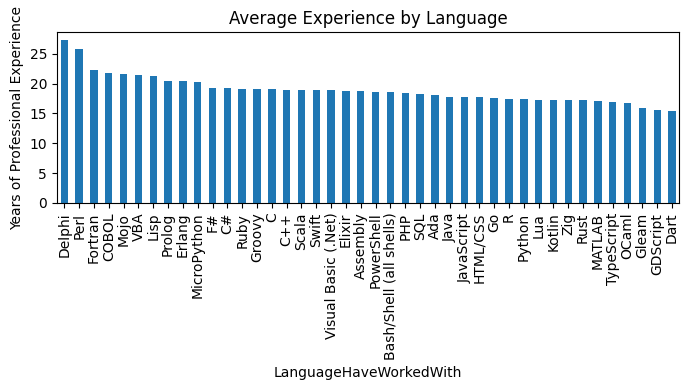

In [36]:
lang_exp = (
    lang_df.groupby("LanguageHaveWorkedWith")["YearsCode"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(7, 4))
lang_exp.plot(kind="bar")
plt.title("Average Experience by Language")
plt.ylabel("Years of Professional Experience")
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig("../reports/figures/language_vs_experience.png", dpi=150)
plt.show()


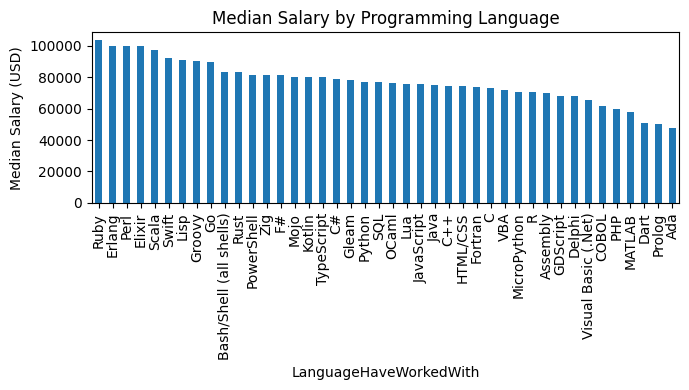

In [37]:
lang_salary = (
    lang_df.groupby("LanguageHaveWorkedWith")["ConvertedCompYearly"]
    .median()
    .sort_values(ascending=False)
)

lang_salary = lang_salary[lang_salary < 300_000]

plt.figure(figsize=(7, 4))
lang_salary.plot(kind="bar")
plt.title("Median Salary by Programming Language")
plt.ylabel("Median Salary (USD)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig("../reports/figures/language_vs_salary.png", dpi=150)
plt.show()


<Figure size 1000x300 with 0 Axes>

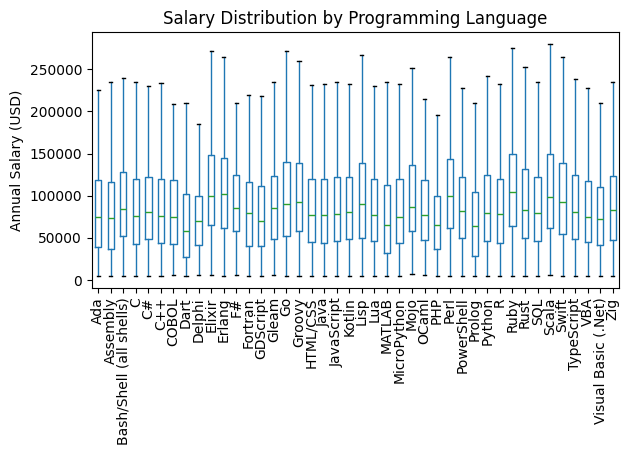

In [38]:
# Filter out extreme salaries
filtered_df = lang_df[
    (lang_df["ConvertedCompYearly"] > 5_000) &
    (lang_df["ConvertedCompYearly"] < 300_000)
]

# Ordered by respondent count
top_languages = (
    filtered_df["LanguageHaveWorkedWith"]
    .value_counts()
    .index
)

plot_df = filtered_df[
    filtered_df["LanguageHaveWorkedWith"].isin(top_languages)
]

plt.figure(figsize=(10, 3))
plot_df.boxplot(
    column="ConvertedCompYearly",
    by="LanguageHaveWorkedWith",
    showfliers=False,
    grid=False
)

plt.title("Salary Distribution by Programming Language")
plt.suptitle("")
plt.ylabel("Annual Salary (USD)")
plt.xlabel("")
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig("../reports/figures/language_salary_distribution.png", dpi=150)
plt.show()